<a href="https://colab.research.google.com/github/PCSchmidt/test-repo/blob/master/Non_Negative_Matrix_Factorization_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![picture](https://drive.google.com/uc?export=view&id=1mI0S8OKhDPQnpFSjIzHSKxBed_FTbrJ5)




## Non-negative matrix factorization 

Non-negative matrix factorization, also known as NMF, is one of the reduced rank factorization methods similar to singular value decomposition and principal component analysis. However, the non-negative matrix factorization method operates under the constraint that the elements are all non-negative and it can only achieve an approximation of the original data matrix of interest.

NMF is used in a wide range of data analysis related problems including sound and image compression, analysis, and decomposition in an equaly wide range of industries including telecommunications, security, defense, engineering, medicine, chemistry, biology, astronomy, physics, and, of course, mathematics.

In 2009, the Netflix prize was won, using, among other techniques, NMF as a component of the winning teams recommender system. 

The main idea is that given a non-negative $m$ by $n$ real-valued matrix $V$ and using a non-negative matrix decomposition process we can decompose $V$ into non-negative real-valued rank r matrices W and H that approximate $V$ and where $r$ is usually significantly smaller than the minimum of 
$m$ or $n$.  

More formally, given $V \in \mathbb{R}_{+}^{m \times n}$ and a desired rank $r << \text{ min }(m, n)$, find $W \in \mathbb{R}_{+}^{m \times r}$ and $H \in \mathbb{R}_{+}^{r \times n}$ such that $V \approx WH$.

This appears as $$\underbrace{\begin{bmatrix} x & x & x & x & x\\x & x & x & x &x\\x & x & x & x & x\end{bmatrix}}_{=V_{m \times n}} \approx \underbrace{\begin{bmatrix}x & x\\x & x\\x & x\\x & x\end{bmatrix}}_{=W_{m \times r}} \underbrace{\begin{bmatrix}x & x & x & x & x\\x & x & x & x & x\\x & x & x & x & x\end{bmatrix}}_{=H_{r \times n}}, \text{ where x $\geq$ 0, r < min{m, n} }$$


The conditions attached to this formulation include that
- We need to solve $\text{ min}_{W\geq 0, H \geq 0}$ for $\left\Vert V - WH \right\Vert_F$. We know $V$ but have to solve for $W$ and $H$.
- This is nonconvex but it is bi-convex. I.e., if $W$ is fixed, then $\frac{1}{2}\left\Vert V-WH\right\Vert_F^2$ is convex and if $H$ is fixed then the same holds and $\frac{1}{2}\left\Vert V-WH\right\Vert_F^2$ is convex.
- $W$ and $H$ are not unique, i.e. $(\hat{W} = WD \geq 0, \hat{H} = D^{-1}H \geq 0)$ where $D$ is some other non-singular matrix that can create another solution pair, say $\hat{W}\hat{H}$.
-$NMF$ improves the approximation as $r$ increases as would be expected. If $\text{ rank }_+(V)>r$, $\underset{W_{r+1}\geq 0,H_{r+1}\geq 0}{min} \left\Vert V-W_{r+1}H_{r+1}\right\Vert_F <\underset{W_{r}\geq 0,H_{r}\geq 0}{min}\left\Vert V-W_rH_r \right\Vert_F$ where $W_i\in\mathbb{R}_+^{m \times i}$ and $H_i \in \mathbb{R}_+^{i \times n}$.
- However, $SVD$ performs better in many cases: If $A = U \Sigma V^T$, then $\left\Vert A-U_r\Sigma_rV_r^T\right\Vert_F \leq \left\Vert V-WH\right\Vert_F$ for $W \in \mathbb{R}_+^{m \times r}$ and $H \in \mathbb{R}_+^{r \times n}$.

### So, Why use NMF?

For non-negative data, what is most commonly seen in real world applications, NMF can give a better lower rank approximation than other approaches in many cases. This data is well described by a simplicial convex cone generated by the columns of $W$ which means that the cone cannot be described by more than the $r$-columns of $W$. This fact has more to do with how the solution must be derived as the biconvexity directs the approaches to finding solutions. 

NMF can automatically extract sparse and easier to interpret features from the non-negative data vectors which is a driver of its popularity. It is, however, an NP-hard problem so approximation algorithms are the only ways to generate solutions.  

### How is a solution derived?

There are numerous algorithms that have been derived to solve NMF problems. We will highlight two of them starting with the Multiplicative Update Rule that was used by Lee and Seung, '99$^1$ and later modified by Lin, '07$^2$ and which is given credit for popularizing NMF. 

![picture](https://drive.google.com/uc?export=view&id=1LumVt-E0tii-_Iiq-u9CO3TrsKZov9cB)

### Multiplicative Update Rule$^1$

Daniel Lee and Sebastian Seung are credited with popularizating this decomposition method with their 1999 article in Nature magazine and their paper, Algorithms for Non-negative Matrix Factorization where they described the Multiplicative Update Rule and offered a proof of convergence. 

The goal of the Multiplicative Update Rule is to minimize some distance measure, say $D(V|WH)$, with respect to $W$ and $H$. There are several approaches to the Multiplicative Update Rule algorithm that are based on either the Frobenius norm, the Kullback-Leibler divergence, and the Itakura_Saito divergence. Here, we describe the approach using the Frobenius norm in detail.  

The idea is to minimize $W$ and $H$ using a block-coordinate descent which we will explain using the Frobenius norm case where the distance measure, or loss function, is the squared distance from $V$ to $WH$ using the Frobenius norm, $\left\Vert V - WH\right\Vert_F^2$ where $\left\Vert A-B\right\Vert_F^2 = \underset{i, j}{\Sigma}(a_{i, j}-B_{i, j})^2$. This approach assumes that the noise in the approximation follows a Gaussian distribution. 

We have an optimzation problem $\{W^*, H^*\}$ = $\underset{W \geq 0, H \geq0}{\text{ arg min }} \frac{1}{2}\left\Vert V-WH\right\Vert_F^2$.

The non-negativity constraints mean that minimizing this loss function jointly with respect to $W$ and $H$ is not possible so they are done separately by holding one fixed while performing an iteration then repeating the process holding the other one fixed. The standard method is to use a gradient descent approach. 

To do gradient descent we need to have 

- $\nabla_W\frac{1}{2}\left\Vert V-WH\right\Vert_F^2$

- $\nabla_H\frac{1}{2}\left\Vert V-WH\right\Vert_F^2$

so that we can perform the gradient descent in a coordinated block descent framework. This means that at each iteration, the algorithm calculates a new set of values, first for W, then for H, or vice versa. This alternating pattern continues until convergence is acheived. 

Note that the trace operator, $Tr$ provides that $\left\Vert A \right\Vert_F^2=TrA^TA$. 

To find the update rule for $W$, fix $H$ and calculate

$$\nabla_W\frac{1}{2}\left\Vert V-WH\right\Vert_F^2 = \frac{1}{2}\nabla_W Tr[(V^T-H^TW^T)(V-WH)]$$
$$=\frac{1}{2}\nabla_WTr[V^TV-V^TWH-H^TW^TV+H^TW^TWH]$$
$$=\frac{1}{2}\nabla_WTr[-V^TWH-H^TW^TV+H^TW^TWH]$$
$$=-VH^T+WHH^T$$

Where this last equality follows from the identity property of $W^TW$ and $H^TH$ and the rules of derivatives with traces of matrices. for more information on derivatives of the trace, this is a useful explanation: https://youtu.be/9fc-kdSRE7Y.

We can see that the update rule below reduces the loss function, 
$$W_{i, j} \leftarrow W_{i, j}+\eta_{i, j}(VH^T-WHH^T)_{i, j}$$ 

To keep the update non-negative, we need to use a special formulation of $\eta_{i, j}$

$$\eta_{i, j} = \frac{W_{i, j}}{(WHH^T)_{i, j}}$$

Substituting this in the formula above, the updating rule becomes

$$= W_{i, j}\leftarrow W_{i, j}\frac{(VH^T)_{i, j}}{(WHH^T)_{i, j}}$$

Similar to above, we repeat this process to find the update rule for $H$


$$\nabla_H\frac{1}{2}\left\Vert V-WH\right\Vert_F^2 = \frac{1}{2}\nabla_H Tr[(V^T-H^TW^T)(V-WH)]$$
$$=\frac{1}{2}\nabla_HTr[V^TV-V^TWH-H^TW^TV+H^TW^TWH]$$
$$=\frac{1}{2}\nabla_WTr[-V^TWH-H^TW^TV+H^TW^TWH]$$
$$=-W^TV+WH^TWH$$

Where, again, this last equality follows from the identity property of $W^TW$ and $H^TH$.

We can see that the update rule below reduces the loss function, 
$$H_{i, j} \leftarrow H_{i, j}+\mu_{i, j}(W^TV-W^TWH)_{i, j}$$ 

To keep the update non-negative as before, we need to use a special formulation of $\mu_{i, j}$

$$\mu_{i, j} = \frac{H_{i, j}}{(W^TWH)_{i, j}}$$

Substituting this in the formula above, the updating rule becomes

$$= H_{i, j}\leftarrow H_{i, j}\frac{(W^TV)_{i, j}}{(W^TWH)_{i, j}}$$

Summarizing the algorithm, the data matrix $V$ is read and using some randomly chosen $W$ and $H$, the update rules for $W_{i, j}$ and $H_{i, j}$ are done iteratively until convergence. 

This algorithm is applied in the Python, through the scikit learn library as the package NMF with detailed information on how it is derived programatically. Information can be found here: https://scikit-learn.org/stable/modules/decomposition.html#nmf. 

### Multiplicative Update Rule based on the Kullback-Leibler divergence

This iteration of the Multiplicative Update Rule uses the Kullback-Leibler divergence as the loss function. 

$$D_{KL}(p, q)=\Sigma_i p(i) log \frac{p(i)}{Q(i)}$$
$$=\Sigma_i \big[p(i)log\frac{p(i)}{q(i)}-p(i) + q(i)\big]$$

Bypassing the rest of the derivations, the Update Rules take the form

$$H\leftarrow H \circ \frac{W^T\frac{V}{WH}}{W^T1}$$
and
$$W \leftarrow W \circ \frac{\frac{V}{WH}H^T}{1H^T}$$

### Multiplicative Update Rule based on the Itakura-Saito divergence

This iteration uses the following loss function. 
$$D_{IS}(p, q)=\Sigma_i\Big[\frac{p(i)}{q(i)}-log \frac{p(i)}{q(i)}-1\Big]$$
$$\Rightarrow D_{IS}(V, WH)=\Sigma_m \Sigma_n \big(\frac{v_{mn}}{WH\rvert_{mn}}-log \frac{v_{mn}}{WH\rvert_{mn}}\big)$$

Again, we will bypass the derivations and skip ro the Update Rules

$$H \leftarrow H \circ \frac{W^T \frac{V}{(WH)^{\circ 2}}}{W^T\frac{1}{WH}}$$  
and
$$W \leftarrow W \circ \frac{\frac{V}{(WH)^{\circ 2}}H^T}{\frac{1}{WH}H^T}$$
where $^{\circ 2}$ means element-wise power and $1$ is a matrix of $1$'s.

### Simple example of NMF using the multiplicative update rule with the Frobenius norm used on a random matrix. 


In [ ]:
# EXAMPLE: Implementation of the Multiplicative Update Rule using the Frobenius Norm
import numpy as np
# Set arbitrary matrix X
X = np.array([[1, 1], [2, 1], [3, 1.2], [4, 1], [5, 0.8], [6, 1]])
from sklearn.decomposition import NMF
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_
X_new = np.array([[1, 0], [1, 6.1], [1, 0], [1, 4], [3.2, 1], [0, 4]])
W_new = model.transform(X_new)
# Verify output minimizes distance by looking at X - WH. Note the values are very close to 0.
X - W @ H

array([[-6.35579822e-04,  6.36528773e-04],
       [ 3.40231372e-04, -3.40739354e-04],
       [ 3.45147253e-04, -3.45662574e-04],
       [ 1.31898319e-04, -1.32095249e-04],
       [-9.00218123e-05,  9.01562192e-05],
       [-8.58722020e-05,  8.60004133e-05]])

### Additional Algorithms

There has been a substantial amount of research into this topic and there are a variety of algorithms that have been developed. A few of the recurring names found in research most frequently include

- Alternating Least Squares (ALS), Berry, et al, '06
- Alternating non-negative least squares (ANLS), Lin, '07, 
- Projected Gradient Descent, D. Kim, et al, '07, 
- Quasi-Newton Optimization, Zdunek, Cichocki, '07 (ref 1.)
- Graph Regularized NMF (ref 25.)
- Probabilistic NMF (ref 25.)
- Kernel NMF (ref 25.)
- Chambolle-Pock based First Order Primal Dual (ref 25.)
- Many more. 

![picture](https://drive.google.com/uc?export=view&id=1Fcit3O0ETVrTlFYUZf005Qlf1h84kuT4)


### Example of NMF using the Multiplicative Update Rule on the Olivetti Faces Dataset



In [ ]:
# Import packages needed including the Olivetti faces image dataset
import sklearn.decomposition as dp
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from numpy.random import RandomState # Create a random seed

In [ ]:
# This was default setting so it is changeable if desired
n_row,n_col=6,3 # Default setting was 2 rows and 3 columns
n_components=n_row*n_col

# Is another image shape better? 
image_shape=(64,64)

# Look at dataset options and different available arguments
datasets=fetch_olivetti_faces(shuffle=True,random_state=RandomState(0))
#dataset=fetch_olivetti_faces(data_home=None,shuffle=False,random_state=0,download_if_missing=True)
faces=datasets.data # loading station open data 

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
# Define a plot gallery to use in the decompositions and to display output
def plot_gallery(title,images,n_col=n_col,n_row=n_row):
    plt.figure(figsize=(2.*n_col,2.26*n_row))  # Create the picture, and specify image size (default setting)
    plt.suptitle(title,size=18)  # Set the title and font size
    
    for i,comp in enumerate(images):
        plt.subplot(n_row,n_col,i+1)  # Drawings of selectors 
        vmax=max(comp.max(),-comp.min())
        # Make the image grayscale to flatten it and get rid of the RGB.
        plt.imshow(comp.reshape(image_shape),cmap=plt.cm.gray,
                   interpolation='nearest',vmin=-vmax,vmax=vmax)  # Of normalized values, and displayed in the form of greyscale
        plt.xticks(())
        plt.yticks(())  # Removed axis label subgraph (why?)
    plt.subplots_adjust(0.01,0.05,0.99,0.94,0.04,0.)  # Subgraph adjust the position and the spacing (what adjustments are going on here?)

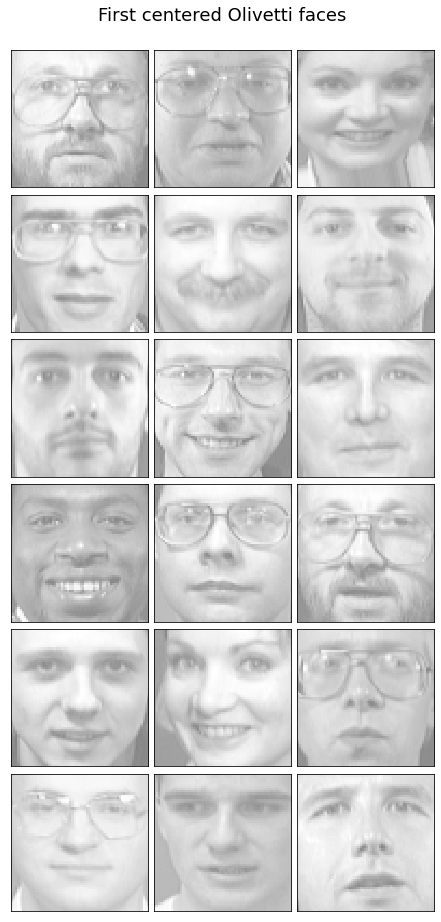

In [ ]:
# Using plot_gallery as defined above. 
plot_gallery('First centered Olivetti faces',faces[:n_components])


In [ ]:
# Running PCA using randomized SVD and NMF in sklearn.decomposition. 
estimators=[
        ('Eigenfaces-PCA using randomized SVD',
         dp.PCA(n_components=6,whiten=True)), # default setting n_component = 6
         ('Non-negative components - NMF',
          dp.NMF(n_components=6,init=None, solver='mu',
                            tol=5e-3))] #NMF with PCA Instantiation


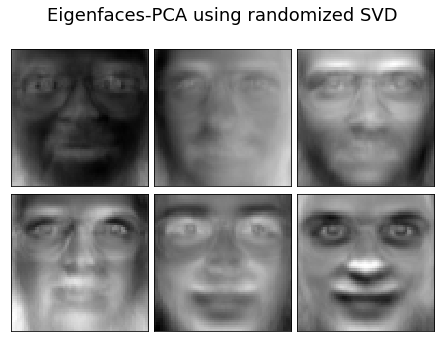

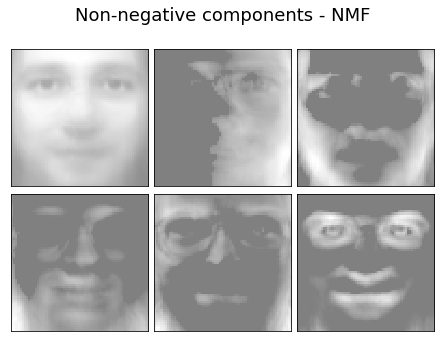

In [ ]:
# Generate the Decomposition Output Unsing PCA and NMF
for name,estimator in estimators:  
    estimator.fit(faces)  #transfer PCA or NMF Feature extraction
    components_=estimator.components_ # Gets feature extraction
    plot_gallery(name,components_[:n_components])  #Arranged according to a fixed format 


In [ ]:
# Display the plot_gallery generated above
plt.show(plot_gallery)

### References
1. link to Lee and Seung paper, '99 https://papers.nips.cc/paper/1861-algorithms-for-non-negative-matrix-factorization.pdf

2. On the Convergence of Multiplicative Update Algorithms for Nonnegative Matrix Factorization, 2007/12/01, IEEE Transactions on Neural Networks, Lin, Chih-Jen, https://www.researchgate.net/publication/3303991_On_the_Convergence_of_Multiplicative_Update_Algorithms_for_Nonnegative_Matrix_Factorization

3.  Non-negative Matrix Factorization with Quasi-Newton Optimization, Springer LNAI, Zdunek, Rafal, Cichocki, Andrzej, 2006/06/25

4. Wikipedia: https://en.wikipedia.org/wiki/Non-negative_matrix_factorization#:~:text=Non%2Dnegative%20matrix%20factorization%20(NMF,matrices%20have%20no%20negative%20elements.

5. https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html

6. https://www.slideshare.net/BenjaminBengfort/non-negative-matrix-factorization

7. https://cims.nyu.edu/~cfgranda/pages/OBDA_fall17/notes/matrix_factorization.pdf

8. http://www.quuxlabs.com/blog/2010/09/matrix-factorization-a-simple-tutorial-and-implementation-in-python/

9. https://medium.com/logicai/non-negative-matrix-factorization-for-recommendation-systems-985ca8d5c16c

10. https://methods.sagepub.com/dataset/howtoguide/non-negative-matrix-factorization-in-news-2016-python

11. https://colab.research.google.com/github/ML-Challenge/week4-unsupervised-learning/blob/master/L4.Discovering%20interpretable%20features.ipynb#scrollTo=ScYrl9Em58mx
12. A TUTORIAL ON NONNEGATIVE MATRIX FACTORISATION WITH APPLICATIONS TO
AUDIOVISUAL CONTENT ANALYSIS, Slim Essid & Alexey Ozerov, Telecom ParisTech / Technicolor, July 2014, https://www.cs.rochester.edu/u/jliu/CSC-576/NMF-tutorial.pdf

13. Non-Negative Matrix Factorization, Extensions and Solvers, https://sites.google.com/site/nmfsolvers/

14. A Tale of Two Matrix Factorizations, Technical Report 185, October 2013
National Institute of Statistical Sciences, Paul Fogel, Douglas M. Hawkins,
Chris Beecher, George Luta, S. Stanley Young, 
https://www.niss.org/sites/default/files/tr185.pdf

15. Week 4, Lecture 7 - Dimensionality Reduction: PCA and NMF, Aaron Meyer
https://aarmey.github.io/ml-for-bioe///public/Wk4-Lecture7.pdf

16. https://github.com/ahmadvh/Non-Negative-Matrix-factorization---Implemented-in-python

17. https://blog.acolyer.org/2019/02/18/the-why-and-how-of-nonnegative-matrix-factorization/

18. https://towardsdatascience.com/parts-based-learning-by-non-negative-matrix-factorisation-1279ffd29618

19. http://www.almoststochastic.com/2013/06/nonnegative-matrix-factorization.html

20. https://stats.stackexchange.com/questions/351359/deriving-multiplicative-update-rules-for-nmf

21. The How and Why of Non-negative Matrix Factorization, N. Gillis, '14 https://arxiv.org/pdf/1401.5226.pdf

22. A Block Coordinate Descent Method for Regularized Multiconvex Optimization
with Applications to Nonnegative Tensor Factorization and Completion, SIAM J. IMAGING SCIENCES c 2013 Society for Industrial and Applied Mathematics
Vol. 6, No. 3, pp. 1758–1789,  Xu, Yin, '13, https://www.math.ucla.edu/~wotaoyin/papers/pdf/Xu%20and%20Yin%20-%202013%20-%20A%20Block%20Coordinate%20Descent%20Method%20for%20Regularized.pdf

23. Nature, October 21, 1999, D. Lee, S Seung, https://www.nature.com/articles/44565

24. Edwin Chen's blog post on winning the Netflix prize, https://blog.echen.me/2011/10/24/winning-the-netflix-prize-a-summary/

25. Python package for NMF with a variety of algorithms, https://github.com/satwik77/libnmf

26. Detailed Derivation of Multiplicative Update Rules for NMF, Burred, Juan Jose', '14, https://www.jjburred.com/research/pdf/jjburred_nmf_updates.pdf